In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("./data/player.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 44 columns):
Unnamed: 0             19820 non-null int64
yearID                 19820 non-null int64
playerID               19820 non-null object
G_x                    19820 non-null int64
AB                     19820 non-null int64
R                      19820 non-null int64
H                      19820 non-null int64
2B                     19820 non-null int64
3B                     19820 non-null int64
HR                     19820 non-null int64
RBI                    19820 non-null float64
SB_x                   19820 non-null float64
CS_x                   19820 non-null float64
BB                     19820 non-null int64
SO                     19820 non-null float64
IBB                    19820 non-null float64
HBP                    19820 non-null float64
SH                     19820 non-null float64
SF                     19820 non-null float64
GIDP                   19820 non-null 

(19820, 44)

In [2]:
df.isnull().values.ravel().sum()

0

In [3]:
# Determine the number of unique 'classes' of each variable
print ('Size of the dataset:', df.shape)
print ('Number of unique classes:\n', df.nunique())

Size of the dataset: (19820, 44)
Number of unique classes:
 Unnamed: 0             19820
yearID                    33
playerID                3497
G_x                      163
AB                       694
R                        146
H                        231
2B                        59
3B                        23
HR                        65
RBI                      157
SB_x                      81
CS_x                      29
BB                       148
SO                       206
IBB                       43
HBP                       33
SH                        29
SF                        18
GIDP                      34
stint                     22
G_y                      189
GS                       164
InnOuts                 4197
PO                      1269
A                        524
E                         39
DP                       159
PB                        27
SB_y                     129
CS_y                      64
Primary                    7
salary      

In [4]:
print ('Number of unique classes:', df['Primary'].nunique())

Number of unique classes: 7


In [5]:
df['Primary'].unique()

array(['SS', 'DH', 'C', '3B', 'OF', '2B', '1B'], dtype=object)

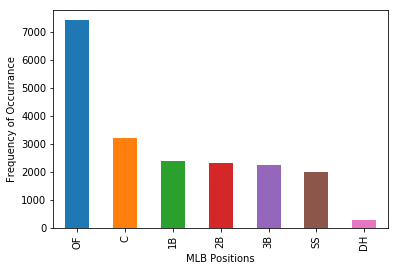

OF    7408
C     3208
1B    2389
2B    2304
3B    2230
SS    1997
DH     284
Name: Primary, dtype: int64

In [6]:
# Examine 'Position' variable in dataset
# Plot frequency of Positions 'classes'
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
df['Primary'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel('MLB Positions')
plt.ylabel('Frequency of Occurrance')
plt.show()
df['Primary'].value_counts()

In [7]:
# Printing Head and Tail of Dataset
df.iloc[np.r_[0:6, -6:0]]

,Unnamed: 0,yearID,playerID,G_x,AB,R,H,2B,3B,HR,...,AnnualPercentChange,Mult2017,MinSalaries,adjSalary,adjMinSalaries,adjSalary2,Bavg,Slug,OBP,FPct
0,0,1985,adamsri02,54,121,12,23,3,1,2,...,3.50%,2.279,60000.0,0.0,136740.0,136740.0,0.190083,0.280992,0.228346,0.964539
1,1,1985,aguaylu01,91,165,27,46,7,3,6,...,3.50%,2.279,60000.0,540123.0,136740.0,540123.0,0.278788,0.466667,0.377551,0.965251
2,2,1985,aikenwi01,12,20,2,4,1,0,1,...,3.50%,2.279,60000.0,0.0,136740.0,136740.0,0.200000,0.400000,0.291667,0.000000
3,3,1985,allenga01,14,34,2,4,1,0,0,...,3.50%,2.279,60000.0,0.0,136740.0,136740.0,0.117647,0.147059,0.117647,1.000000
4,4,1985,almonbi01,88,244,33,66,17,0,6,...,3.50%,2.279,60000.0,581145.0,136740.0,581145.0,0.270492,0.413934,0.329630,0.976959
5,5,1985,anderda02,77,221,24,44,6,0,4,...,3.50%,2.279,60000.0,0.0,136740.0,136740.0,0.199095,0.280543,0.310078,0.964981
19814,19814,2017,younger03,47,110,24,29,5,0,4,...,2.10%,1.000,535000.0,0.0,535000.0,535000.0,0.263636,0.418182,0.336066,1.000000
19815,19815,2017,zagunma01,7,14,0,0,0,0,0,...,2.10%,1.000,535000.0,0.0,535000.0,535000.0,0.000000,0.000000,0.222222,1.000000
19816,19816,2017,zimmebr01,101,299,41,72,15,2,8,...,2.10%,1.000,535000.0,0.0,535000.0,535000.0,0.240803,0.384615,0.307229,1.000000
19817,19817,2017,zimmery01,144,524,90,159,33,0,36,...,2.10%,1.000,535000.0,0.0,535000.0,535000.0,0.303435,0.572519,0.357639,0.988743


In [8]:
#Drop Categorial Columns with no predictive ability
df.drop(['Annual Average', 'AnnualPercentChange', 'Mult2017', 'MinSalaries', 'salary', 'adjSalary', 'adjMinSalaries','playerID','Unnamed: 0','yearID'], inplace=True, axis=1)

In [9]:
# Printing Head and Tail of Dataset
df.iloc[np.r_[0:6, -6:0]]

,G_x,AB,R,H,2B,3B,HR,RBI,SB_x,CS_x,...,DP,PB,SB_y,CS_y,Primary,adjSalary2,Bavg,Slug,OBP,FPct
0,54,121,12,23,3,1,2,10.0,1.0,1.0,...,13.0,0.0,0.0,0.0,SS,136740.0,0.190083,0.280992,0.228346,0.964539
1,91,165,27,46,7,3,6,21.0,1.0,0.0,...,27.0,0.0,0.0,0.0,SS,540123.0,0.278788,0.466667,0.377551,0.965251
2,12,20,2,4,1,0,1,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,DH,136740.0,0.200000,0.400000,0.291667,0.000000
3,14,34,2,4,1,0,0,3.0,0.0,0.0,...,0.0,0.0,3.0,2.0,C,136740.0,0.117647,0.147059,0.117647,1.000000
4,88,244,33,66,17,0,6,29.0,10.0,7.0,...,22.0,0.0,0.0,0.0,SS,581145.0,0.270492,0.413934,0.329630,0.976959
5,77,221,24,44,6,0,4,18.0,5.0,4.0,...,20.0,0.0,0.0,0.0,3B,136740.0,0.199095,0.280543,0.310078,0.964981
19814,47,110,24,29,5,0,4,16.0,12.0,3.0,...,0.0,0.0,0.0,0.0,OF,535000.0,0.263636,0.418182,0.336066,1.000000
19815,7,14,0,0,0,0,0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,OF,535000.0,0.000000,0.000000,0.222222,1.000000
19816,101,299,41,72,15,2,8,39.0,18.0,1.0,...,1.0,0.0,0.0,0.0,OF,535000.0,0.240803,0.384615,0.307229,1.000000
19817,144,524,90,159,33,0,36,108.0,1.0,0.0,...,100.0,0.0,0.0,0.0,1B,535000.0,0.303435,0.572519,0.357639,0.988743


##### Converting Player Positions to numeric values

For KNN Analysis, we will be converting the 'Primary' position variable to a numeric value.  The numeric values chosen are the typical position indicators used by MLB teams:  
Catcher(C):  2  
1st Base(1B):  3  
2nd Base(2B):  4  
Short Stop(SS): 6  
OutFielder(OF): 7  
DesignatedHitters(DH): 10

In [10]:
#Convert Player positions to numeric indicators
df['Primary'] = df['Primary'].map({'1B':3, '2B':4, '3B':5, 'C':2, 'SS':6, 'OF':7, 'DH':10})

In [12]:
#Set minimum games at 30
df = df[df['G_x'] > 30]
df = df.reset_index(drop=True)
df['Primary'].value_counts()

7     5682
2     2128
3     1832
5     1742
4     1735
6     1572
10      79
Name: Primary, dtype: int64

#### KNN Classification Parameter Optimization with GridSearch

K-Nearest Neighbor (KNN) classification is valid option for this dataset since the dataset has been preprocessed and it has no missing values.  Parameter selections are critical to the performance of KNN classifiers; therefore, substantial time and effort was put forth to fully investigate the optimal parameters. 

##### Parameter Analysis:

*Algorithms:*  Algorithm used to compute the nearest neighbors can be ‘auto’matically determine the most appropriate algorithm to use for the given dataset/parameters, so it was left as default in our GridSearch

##### GridSearch Parameters:

*n_neighbors:* 	Number of neighbors to use in the analysis.  Preliminary analyses were conducted to find a desired range of for number of neighbors.  From these analyses, it was determined that the optimal number of neighbors is below 15.  Above 15, the accuracy plateaus and start to decrease.

*Leaf_size:*  	The leaf size was adjusted, using: 10, 30, and 100 as the parameters.  While there is an over-head penalty with using smaller leaves, accuracy may increase, so we will use it in our Grid Search.

*Metric:*		How distance is measure between datapoints can be adjusted.  The 2 options chosen were ‘minkowski’ and ‘euclidean’.

*Weights:* 	Both uniform and distance were looked at.  ‘Uniform’ weight-all neighboring points get equal weight.  ‘Distance’ weights points by the inverse of their distance.


*Predictor Variables:*  
Many of the predictor variable have different scaling, so to ensure all variables were treated equally in the analysis, all predictor variables are scaled to have a mean of 0 and Standard deviation of 1.

In [13]:
#KNN Classification 10-fold cross-validation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
import warnings
warnings.filterwarnings('ignore')

#Xtemp = df.drop(['Primary'], axis=1)
# create variables we are more familiar with
y = df.Primary
X = df.drop(['Primary'], axis=1)

#yhat = np.zeros(y.shape) # we will fill this with predictions

# Scaling training variables
scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)


ClsEstimator = KNeighborsClassifier()

parameters = { 'n_neighbors':[3,5,13]
              ,'weights': ['uniform','distance']
              ,'leaf_size': [10,30]
              ,'metric': ['minkowski','euclidean']
             }
#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
ClsGridSearch = GridSearchCV(estimator=ClsEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
ClsGridSearch.fit(X, y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 12.9min
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed: 24.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_neighbors': [3, 5, 13], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 30, 100], 'metric': ['minkowski', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

The GridSearch algorithm determined the following optimal paramters for K-Neighbors Algorithn.

*Leaf-Size:* 10  
*Number of Neighbors:* 13  
*Distance Matric:* Minkowski  
*Weights:* Uniform

In [14]:
#Use the best parameters for our KNN classifier
ClsGridSearchEst = ClsGridSearch.best_estimator_
print(ClsGridSearchEst)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


Re-ran the KNN classification analysis with the optimal algorithm parameters that were determined by the parameter GridSearch.  

*KNN Classifier accuracy* with optimal Parameters is *80.8%*

In [23]:
yhat = np.zeros(y.shape) # initializing variable

for train, test in cv.split(X,y):
    # Use Results parameters from GridSearch to run KNN Classifier model
    clf_knn = KNeighborsClassifier(n_neighbors=13, weights='uniform',metric='minkowski', algorithm='auto',p=2,leaf_size=10)
    clf_knn.fit(X[train],y[train])
    yhat[test] = clf_knn.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
#print KNN accuracy with corresponding parameter settings
print('KNN classifier accuracy with optimal parameters is: %.3f'%(total_accuracy))

KNN classifier accuracy with optimal parameters is: 0.808


##### Confusion Matrix:
Below is the confusion matrix for the KNN position classification analysis. The matrix was normalized to show percentage of classifications in lieu of actual number of predictions, so that it can easily be interpreted. 

Excellent Predictability:
Positions; 1st Base(3) 96%, ShortStop(6) 97%, and Designated Hitter(10) 100% 
Moderate Predictability:
Position; 3rd Base(5) 74%, had moderate predictability. When misclassified, 3rd base was most often mistaken for 1st Base (3).
Average Predictability:
Positions; Catcher(2) 66%, 2nd Base(4) 51%, and Outfield(7) 60% were often misclassified as one another.  The classification of these 3 positions is sub optimal.


Normalized confusion matrix


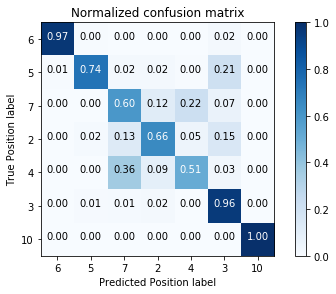

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = df['Primary'].unique()

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Position label')
    plt.xlabel('Predicted Position label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### NearestCentroid  - Nothing below is used;

In [17]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

# the parameters for the nearest centroid metric to test are:
#    l1 (manhattan), l2 (euclidean), and cosine

parm2 = ['l1', 'l2', 'cosine']

for p in parm2:
   
    for train, test in cv.split(X,y):
        clf_nc = NearestCentroid(metric=p)
        clf_nc.fit(X[train],y[train])
    print('Nearest Centroid Classifier mean accuracy with distance matrix:',p,'is:',clf_nc.score(X[test], y[test]))

Nearest Centroid Classifier mean accuracy with distance matrix: l1 is: 0.689280868385346
Nearest Centroid Classifier mean accuracy with distance matrix: l2 is: 0.6933514246947082
Nearest Centroid Classifier mean accuracy with distance matrix: cosine is: 0.6139755766621439


In [18]:
%%time
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline

# setup pipeline to take PCA, then fit a KNN classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=15,svd_solver='randomized')),
     ('CLF',KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski',p=2, algorithm='auto'))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN, pipeline accuracy', total_accuracy)

KNN, pipeline accuracy 0.7927555856465809
Wall time: 3.53 s
